In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [365]:
##lets create a synthetic data points
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [366]:
X

array([[-0.05900511, -1.74913012],
       [ 1.34570366, -0.63758409],
       [ 2.18858709, -0.43810301],
       ...,
       [ 0.35418624,  1.03296413],
       [ 0.04471303, -1.42185926],
       [ 0.24018794, -1.46539509]], shape=(1000, 2))

In [367]:
y

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,

<Axes: xlabel='0', ylabel='1'>

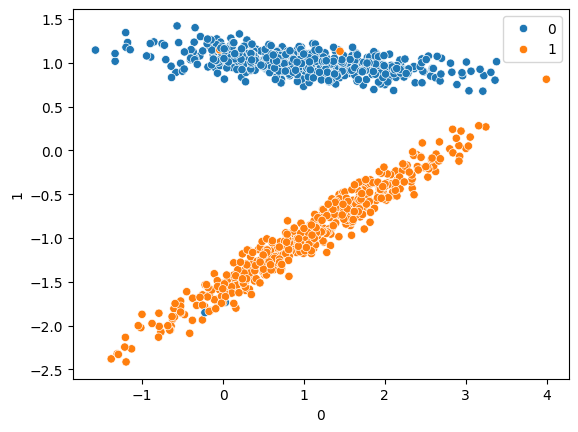

In [368]:

sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [369]:
df=pd.DataFrame(X,columns=["Feature 1","Feature 2"])
df["Class"]=y

In [370]:
df

,Feature 1,Feature 2,Class
0,-0.059005,-1.749130,1
1,1.345704,-0.637584,1
2,2.188587,-0.438103,1
3,-0.792749,-1.858119,1
4,2.072145,0.949882,0
...,...,...,...
995,0.291815,-1.464513,1
996,0.786093,-1.047409,1
997,0.354186,1.032964,0
998,0.044713,-1.421859,1


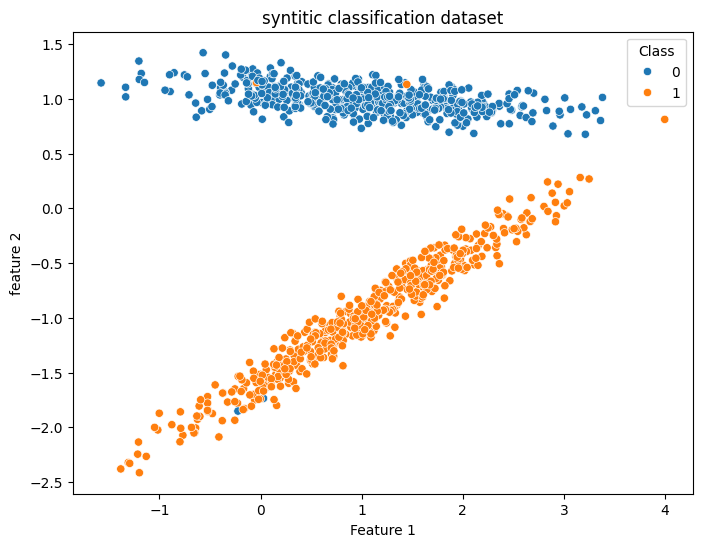

In [371]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x="Feature 1",y="Feature 2",hue="Class")
plt.title("syntitic classification dataset")
plt.xlabel("Feature 1")
plt.ylabel("feature 2")
plt.show()

<Axes: xlabel='0', ylabel='1'>

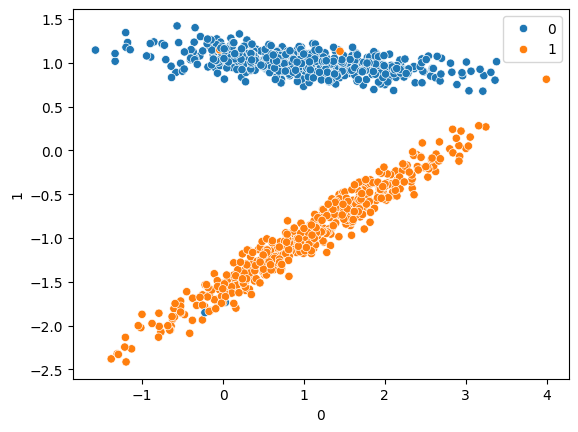

In [372]:
sns.scatterplot(df,x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [373]:
from sklearn.svm import SVC
svc=SVC(kernel="linear")

In [374]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=43)

In [375]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [376]:
y_pred=svc.predict(X_test)

In [377]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       137
           1       0.98      1.00      0.99       113

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[135   2]
 [  0 113]]


In [378]:
rbf=SVC(kernel="rbf")
rbf.fit(X_train,y_train)
y_pred1=rbf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       137
           1       0.98      1.00      0.99       113

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[135   2]
 [  0 113]]


In [379]:
polynomial=SVC(kernel="poly")
polynomial.fit(X_train,y_train)
y_pred2=polynomial.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       137
           1       0.98      1.00      0.99       113

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[135   2]
 [  0 113]]


In [380]:
sigmoid=SVC(kernel="sigmoid")
sigmoid.fit(X_train,y_train)
y_pred3=sigmoid.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       137
           1       0.98      0.94      0.96       113

    accuracy                           0.96       250
   macro avg       0.97      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[135   2]
 [  7 106]]


In [381]:
precomputed=SVC(kernel="precomputed")
precomputed.fit(X_train,y_train)
y_pred4=precomputed.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

ValueError: Precomputed matrix must be a square matrix. Input is a 750x2 matrix.

In [258]:
#now we are going to do the hyper paramter tuning
from sklearn.model_selection import GridSearchCV
#Defining parameter range
param_grid={"C":[0.1,1,10,100,1000],
            "gamma":[1,0.1,0.01,0.001,0.0001],
            "kernel":["rbf"]
            }

In [262]:
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5,verbose=3,n_jobs=-1,refit=True)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [263]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [264]:
y_pred5=grid.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       123
           1       0.90      0.90      0.90       127

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[111  12]
 [ 13 114]]
